In [4]:
import pandas as pd
import numpy as np
from math import log,sqrt
import matplotlib.pyplot as plt
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
%matplotlib inline

In [5]:
from wordcloud import WordCloud

In [6]:
df=pd.DataFrame()
df=pd.read_csv('spam.csv',encoding='latin-1')

In [7]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [9]:
df.shape

(5572, 5)

In [10]:
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

In [11]:
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives around here though",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,"This is the 2nd time we have tried 2 contact u. U have won the å£750 Pound prize. 2 claim is easy, call 087187272008 NOW1! Only 10p per minute. BT-national-rate.",NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other suggestions?",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd be interested in buying something else next week and he gave it to us for free,NaN,NaN,NaN


In [12]:
df.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis=1,inplace=True)

In [13]:
df.rename(columns = {'v1': 'labels', 'v2': 'message'}, inplace = True)

In [14]:
df['label'] = df['labels'].map({'ham': 0, 'spam': 1})

In [15]:
df.drop(['labels'], axis = 1, inplace = True)

In [16]:
X=df['message']
y=df['label']

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2)

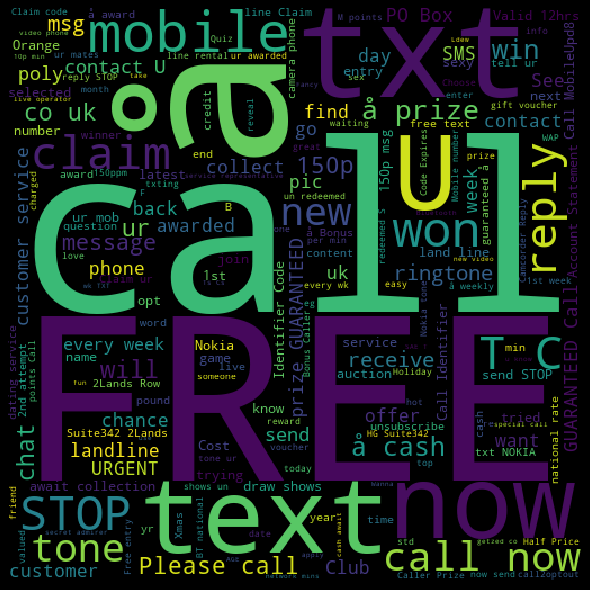

In [19]:
spam_words=''.join(list(df[df['label']==1]['message']))
spam_wc=WordCloud(width=512,height=512).generate(spam_words)
plt.figure(figsize=(10,8),facecolor='k')
plt.imshow(spam_wc)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

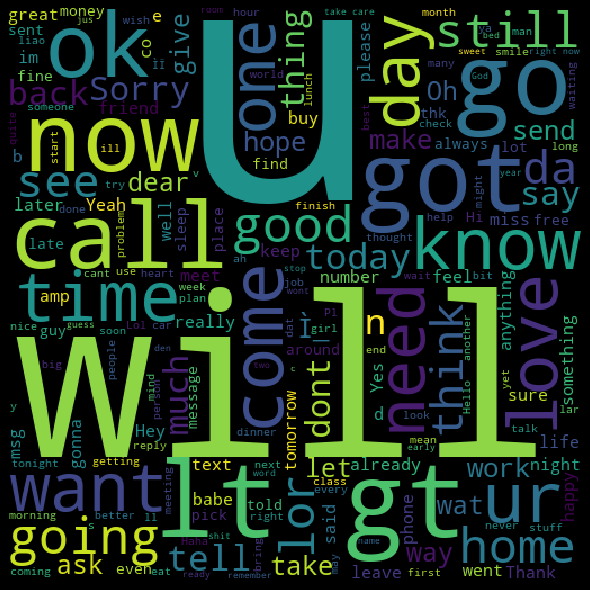

In [20]:
spam_words=''.join(list(df[df['label']==0]['message']))
spam_wc=WordCloud(width=512,height=512).generate(spam_words)
plt.figure(figsize=(10,8),facecolor='k')
plt.imshow(spam_wc)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [21]:
import nltk

In [22]:
import string

In [70]:
def process(message):
    nopunc=[char for char in message if char not in string.punctuation]
    nopunc=''.join(nopunc)
    clean =[word for word in nopunc.split() if word.lower() not in stopwords.words('english')]
    return clean

In [68]:
for message in df['message']:
    nopunc= char for char in message if char not in string.punctuation
    nopunc=''.join(nopunc)
    clean = word for word in nopunc.split() if word.lower() not in stopwords.words('english')
    return clean

SyntaxError: invalid syntax (<ipython-input-68-ae5b7195bb91>, line 2)

In [56]:
text='No no:)this is kallis home ground.amla home town is durban:)'

In [73]:
nopunc=[char for char in df['message'] if char not in string.punctuation]
nopunc=''.join(nopunc)
clean = [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]
print(clean)

TypeError: 'in <string>' requires string as left operand, not list

In [58]:
nopunc

'No nothis is kallis home groundamla home town is durban'

In [72]:
df['message']=df['message'].apply(process)

In [74]:
df

,message,label
0,"[Go, jurong, point, crazy, Available, bugis, n, great, world, la, e, buffet, Cine, got, amore, wat]",0
1,"[Ok, lar, Joking, wif, u, oni]",0
2,"[Free, entry, 2, wkly, comp, win, FA, Cup, final, tkts, 21st, May, 2005, Text, FA, 87121, receive, entry, questionstd, txt, rateTCs, apply, 08452810075over18s]",1
3,"[U, dun, say, early, hor, U, c, already, say]",0
4,"[Nah, dont, think, goes, usf, lives, around, though]",0
...,...,...
5567,"[2nd, time, tried, 2, contact, u, U, å£750, Pound, prize, 2, claim, easy, call, 087187272008, NOW1, 10p, per, minute, BTnationalrate]",1
5568,"[Ì, b, going, esplanade, fr, home]",0
5569,"[Pity, mood, Soany, suggestions]",0
5570,"[guy, bitching, acted, like, id, interested, buying, something, else, next, week, gave, us, free]",0


In [ ]:
df.iloc[[1114]]

In [81]:
from sklearn.feature_extraction.text import CountVectorizer
text = CountVectorizer(analyzer=process).fit_transform(df['message'])

In [84]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(text, df['label'], test_size=0.20, random_state=0)

In [85]:
text.shape

(5572, 5113)

In [86]:
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB().fit(xtrain,ytrain)

In [87]:
print(classifier.predict(xtrain))

[0 0 0 ... 0 0 0]


In [88]:
print(ytrain.values)

[0 0 0 ... 0 0 0]


In [89]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [94]:
pred = classifier.predict(xtrain)
print(classification_report(ytrain, pred))

              precision    recall  f1-score   support

           0       0.87      1.00      0.93      3876
           1       0.00      0.00      0.00       581

    accuracy                           0.87      4457
   macro avg       0.43      0.50      0.47      4457
weighted avg       0.76      0.87      0.81      4457



In [93]:
print("Confusion Matrix: \n", confusion_matrix(ytrain, pred))


Confusion Matrix: 
 [[3876    0]
 [ 581    0]]


In [92]:
print("Accuracy: \n", accuracy_score(ytrain, pred))

Accuracy: 
 0.8696432577967242


In [95]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
pred = classifier.predict(xtest)
print(classification_report(ytest, pred))
print()
print("Confusion Matrix: \n", confusion_matrix(ytest, pred))
print("Accuracy: \n", accuracy_score(ytest, pred))

              precision    recall  f1-score   support

           0       0.85      1.00      0.92       949
           1       0.00      0.00      0.00       166

    accuracy                           0.85      1115
   macro avg       0.43      0.50      0.46      1115
weighted avg       0.72      0.85      0.78      1115


Confusion Matrix: 
 [[949   0]
 [166   0]]
Accuracy: 
 0.8511210762331839


In [98]:
confusion_matrix(y,pred)

ValueError: Found input variables with inconsistent numbers of samples: [5572, 1115]

In [48]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [100]:
from sklearn.svm import SVC, NuSVC, LinearSVC
model2 = LinearSVC()

In [102]:
result=model2.fit(xtrain,ytrain)

In [103]:
result2 = model2.predict(xtrain)

In [16]:
def process_message(message, lower_case = True, stem = True, stop_words = True, gram = 2):
    if lower_case:
        message = message.lower()
    words = word_tokenize(message)
    words = [w for w in words if len(w) > 2]
    if gram > 1:
        w = []
        for i in range(len(words) - gram + 1):
            w += [' '.join(words[i:i + gram])]
        return w
    if stop_words:
        sw = stopwords.words('english')
        words = [word for word in words if word not in sw]
    if stem:
        stemmer = PorterStemmer()
        words = [stemmer.stem(word) for word in words]   
    return words

In [17]:
class SpamClassifier(object):
    def __init__(self, trainData, method = 'tf-idf'):
        self.mails, self.labels = trainData['message'], trainData['label']
        self.method = method

    def train(self):
        self.calc_TF_and_IDF()
        if self.method == 'tf-idf':
            self.calc_TF_IDF()
        else:
            self.calc_prob()

    def calc_prob(self):
        self.prob_spam = dict()
        self.prob_ham = dict()
        for word in self.tf_spam:
            self.prob_spam[word] = (self.tf_spam[word] + 1) / (self.spam_words + \
                                                                len(list(self.tf_spam.keys())))
        for word in self.tf_ham:
            self.prob_ham[word] = (self.tf_ham[word] + 1) / (self.ham_words + \
                                                                len(list(self.tf_ham.keys())))
        self.prob_spam_mail, self.prob_ham_mail = self.spam_mails / self.total_mails, self.ham_mails / self.total_mails 


    def calc_TF_and_IDF(self):
        noOfMessages = self.mails.shape[0]
        self.spam_mails, self.ham_mails = self.labels.value_counts()[1], self.labels.value_counts()[0]
        self.total_mails = self.spam_mails + self.ham_mails
        self.spam_words = 0
        self.ham_words = 0
        self.tf_spam = dict()
        self.tf_ham = dict()
        self.idf_spam = dict()
        self.idf_ham = dict()
        for i in range(noOfMessages):
            message_processed = process_message(self.mails[i])
            count = list() #To keep track of whether the word has ocured in the message or not.
                           #For IDF
            for word in message_processed:
                if self.labels[i]:
                    self.tf_spam[word] = self.tf_spam.get(word, 0) + 1
                    self.spam_words += 1
                else:
                    self.tf_ham[word] = self.tf_ham.get(word, 0) + 1
                    self.ham_words += 1
                if word not in count:
                    count += [word]
            for word in count:
                if self.labels[i]:
                    self.idf_spam[word] = self.idf_spam.get(word, 0) + 1
                else:
                    self.idf_ham[word] = self.idf_ham.get(word, 0) + 1

    def calc_TF_IDF(self):
        self.prob_spam = dict()
        self.prob_ham = dict()
        self.sum_tf_idf_spam = 0
        self.sum_tf_idf_ham = 0
        for word in self.tf_spam:
            self.prob_spam[word] = (self.tf_spam[word]) * log((self.spam_mails + self.ham_mails) \
                                                          / (self.idf_spam[word] + self.idf_ham.get(word, 0)))
            self.sum_tf_idf_spam += self.prob_spam[word]
        for word in self.tf_spam:
            self.prob_spam[word] = (self.prob_spam[word] + 1) / (self.sum_tf_idf_spam + len(list(self.prob_spam.keys())))
            
        for word in self.tf_ham:
            self.prob_ham[word] = (self.tf_ham[word]) * log((self.spam_mails + self.ham_mails) \
                                                          / (self.idf_spam.get(word, 0) + self.idf_ham[word]))
            self.sum_tf_idf_ham += self.prob_ham[word]
        for word in self.tf_ham:
            self.prob_ham[word] = (self.prob_ham[word] + 1) / (self.sum_tf_idf_ham + len(list(self.prob_ham.keys())))
            
    
        self.prob_spam_mail, self.prob_ham_mail = self.spam_mails / self.total_mails, self.ham_mails / self.total_mails 
                    
    def classify(self, processed_message):
        pSpam, pHam = 0, 0
        for word in processed_message:                
            if word in self.prob_spam:
                pSpam += log(self.prob_spam[word])
            else:
                if self.method == 'tf-idf':
                    pSpam -= log(self.sum_tf_idf_spam + len(list(self.prob_spam.keys())))
                else:
                    pSpam -= log(self.spam_words + len(list(self.prob_spam.keys())))
            if word in self.prob_ham:
                pHam += log(self.prob_ham[word])
            else:
                if self.method == 'tf-idf':
                    pHam -= log(self.sum_tf_idf_ham + len(list(self.prob_ham.keys()))) 
                else:
                    pHam -= log(self.ham_words + len(list(self.prob_ham.keys())))
            pSpam += log(self.prob_spam_mail)
            pHam += log(self.prob_ham_mail)
        return pSpam >= pHam
    
    def predict(self, testData):
        result = dict()
        for (i, message) in enumerate(testData):
            processed_message = process_message(message)
            result[i] = int(self.classify(processed_message))
        return result

In [18]:

def metrics(labels, predictions):
    true_pos, true_neg, false_pos, false_neg = 0, 0, 0, 0
    for i in range(len(labels)):
        true_pos += int(labels[i] == 1 and predictions[i] == 1)
        true_neg += int(labels[i] == 0 and predictions[i] == 0)
        false_pos += int(labels[i] == 0 and predictions[i] == 1)
        false_neg += int(labels[i] == 1 and predictions[i] == 0)
    precision = true_pos / (true_pos + false_pos)
    recall = true_pos / (true_pos + false_neg)
    Fscore = 2 * precision * recall / (precision + recall)
    accuracy = (true_pos + true_neg) / (true_pos + true_neg + false_pos + false_neg)

    print("Precision: ", precision)
    print("Recall: ", recall)
    print("F-score: ", Fscore)
    print("Accuracy: ", accuracy)

In [20]:
sc_tf_idf = SpamClassifier(X_train, 'tf-idf')
sc_tf_idf.train()
preds_tf_idf = sc_tf_idf.predict(testData['message'])
metrics(testData['label'], preds_tf_idf)

KeyError: 'message'

In [ ]:
sc_bow = SpamClassifier(trainData, 'bow')
sc_bow.train()
preds_bow = sc_bow.predict(testData['message'])
metrics(testData['label'], preds_bow)

In [ ]:
pm = process_message('I cant pick the phone right now. Pls send a message')
sc_tf_idf.classify(pm)

In [ ]:
pm = process_message('Congratulations ur awarded $500 ')
sc_tf_idf.classify(pm)